In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Load Dataset
digits = load_digits()


In [ ]:

X = digits.data  # 64 pixel values for each image
y = digits.target  # Labels (digits 0-9)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train a Model
model = LogisticRegression(max_iter=2000, random_state=42, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=42)

In [ ]:
#  Make Predictions
y_pred = model.predict(X_test)

In [ ]:
#  Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9722

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



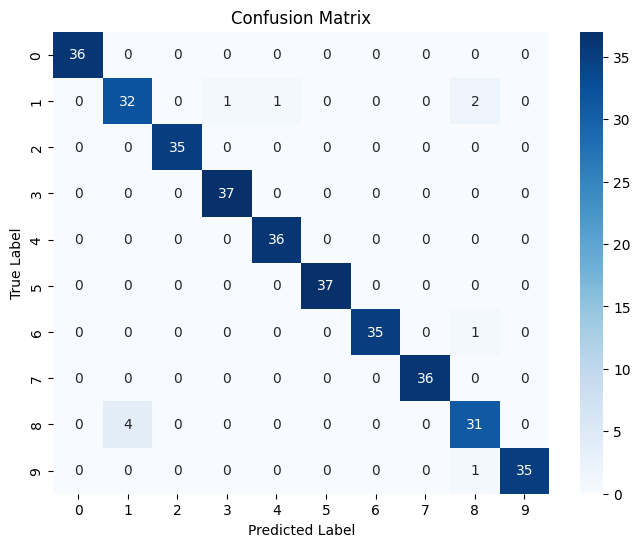

In [ ]:
# Step 8: Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



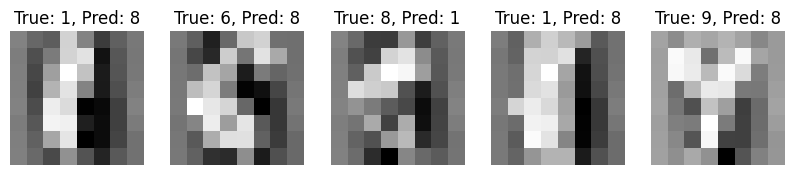

In [ ]:
# Step 9: Visualize Some Misclassified Images
misclassified = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified[:5]):  # Show first 5 misclassified images
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis("off")
plt.show()